In [1]:
from keras.models import load_model
from keras_applications import mobilenet_v2 

from utils.analyzer import Analyzer

/Users/dave/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model_directory = 'saved_models'
model_saved = '2018_07_16_mobilenet_v2_8951'

model = load_model('{}/{}.h5'.format(model_directory, model_saved), 
                   custom_objects={'relu6': mobilenet_v2.relu6})

In [3]:
image_types = ['bed', 'lamp', 'couch', 'table', 'chair']

In [4]:
analyzer = Analyzer()

In [5]:
images_processed, classes_processed = analyzer.load_images(
    image_types=image_types,
    directory='../downloaded_images/fine_tuning/',
    images_per_type=10,
    image_size=224,
    process=True,
    model=mobilenet_v2
)

Mapping:
{'bed': 0, 'lamp': 1, 'couch': 2, 'table': 3, 'chair': 4}


In [6]:
images_unprocessed, classes_unprocessed = analyzer.load_images(
    image_types=image_types,
    directory='../downloaded_images/fine_tuning/',
    images_per_type=10,
    image_size=224,
    process=False,
    model=mobilenet_v2
)

In [7]:
predictions = analyzer.predict(model, images_processed)

In [8]:
analyzer.accuracy(predictions, classes_processed)

Overall Accuracy: {}%


In [9]:
analyzer.accuracy(predictions=predictions,
                  answers=classes_processed,
                  simple=False,
                  image_types=image_types)

Accuracy per classification:
bed: 9/10, 90.0%
Accuracy per classification:
lamp: 7/10, 70.0%
Accuracy per classification:
couch: 9/10, 90.0%
Accuracy per classification:
table: 6/10, 60.0%
Accuracy per classification:
chair: 10/10, 100.0%


Image 1:
Correct answer: table
Prediction:	table

bed 0.0013095734
lamp 0.031192968
couch 0.0010308072
table 0.949769
chair 0.0166977


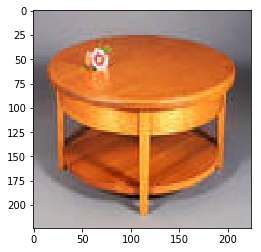

------------------------------
Image 2:
Correct answer: lamp
Prediction:	lamp

bed 0.00014610797
lamp 0.9995915
couch 7.354502e-05
table 1.3994797e-05
chair 0.00017493073


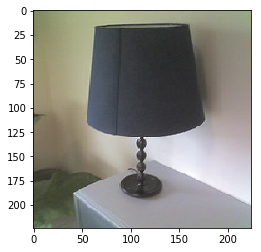

------------------------------
Image 3:
Correct answer: bed
Prediction:	bed

bed 0.9903942
lamp 0.0021622088
couch 0.0072968747
table 0.00012291892
chair 2.3844766e-05


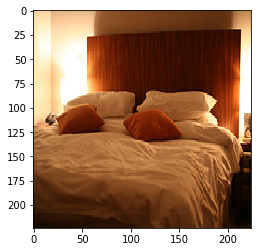

------------------------------
Image 4:
Correct answer: lamp
Prediction:	lamp

bed 8.90378e-05
lamp 0.9993973
couch 2.431186e-05
table 5.5354783e-05
chair 0.0004339902


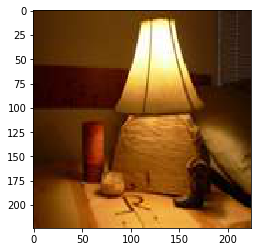

------------------------------
Image 5:
Correct answer: bed
Prediction:	bed

bed 0.995849
lamp 0.0034843374
couch 0.0004300041
table 0.0002217916
chair 1.480714e-05


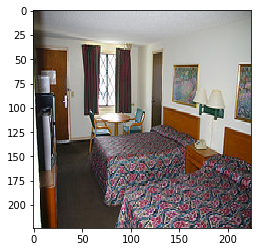

------------------------------
Image 6:
Correct answer: lamp
Prediction:	lamp

bed 0.0022263818
lamp 0.99155056
couch 0.0023143808
table 0.0033995714
chair 0.00050906837


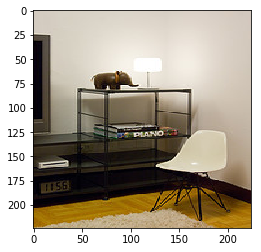

------------------------------
Image 7:
Correct answer: lamp
Prediction:	lamp

bed 0.00011039709
lamp 0.99942756
couch 2.9706203e-05
table 0.00035398177
chair 7.838277e-05


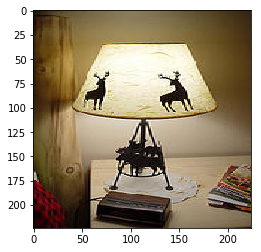

------------------------------
Image 8:
Correct answer: table
Prediction:	table

bed 0.018529909
lamp 0.31083074
couch 0.004974312
table 0.6454223
chair 0.020242777


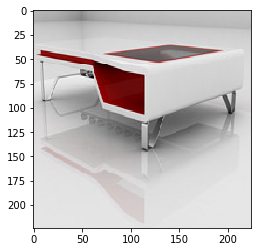

------------------------------
Image 9:
Correct answer: lamp
Prediction:	lamp

bed 0.008151782
lamp 0.883056
couch 0.013287084
table 0.09462315
chair 0.00088190835


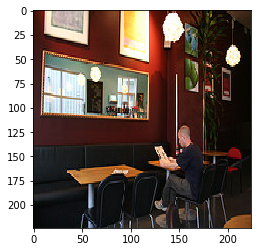

------------------------------
Image 10:
Correct answer: bed
Prediction:	bed

bed 0.9480537
lamp 0.0072814547
couch 0.023708021
table 0.02058401
chair 0.00037282446


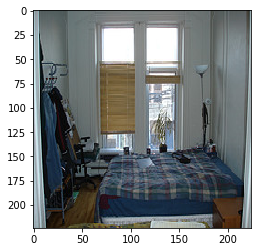

------------------------------


In [11]:
analyzer.show_results(predictions=predictions,
                      answers=classes_processed,
                      image_types=image_types,
                      images=images_unprocessed,
                      correctness='correct',
                      specific_image_types=['bed', 'lamp', 'table'],
                      sample_count=10)